<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Improved_CNN_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxxxxxx"

In [3]:
!kaggle datasets download noulam/tomato

 98% 729M/743M [00:09<00:00, 77.0MB/s]
100% 743M/743M [00:09<00:00, 81.9MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [2]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [3]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(256,256,3))

print("Number of layers in the base model: ", len(base_model.layers))

87916544/87910968 [==============================] - 1s 0us/step
Number of layers in the base model:  311


In [4]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [0]:
base_model.trainable = True

fine_tune_at = 280
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [10]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 6, 6, 2048)        21802784  
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              75498496  
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 97,311,530
Trainable params: 81,582,282
Non-trainable params: 15,729,248
_________________________________

# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999 or logs.get('val_accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# **Begin Training**

In [14]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
144/144 [==============================] - 259s 2s/step - loss: 3.3888 - accuracy: 0.5500 - val_loss: 0.6083 - val_accuracy: 0.7998
Epoch 2/50
144/144 [==============================] - 258s 2s/step - loss: 0.6726 - accuracy: 0.7852 - val_loss: 0.4527 - val_accuracy: 0.8561
Epoch 3/50
144/144 [==============================] - 257s 2s/step - loss: 0.5172 - accuracy: 0.8410 - val_loss: 0.3882 - val_accuracy: 0.8711
Epoch 4/50
144/144 [==============================] - 258s 2s/step - loss: 0.4332 - accuracy: 0.8641 - val_loss: 0.3428 - val_accuracy: 0.8914
Epoch 5/50
144/144 [==============================] - 261s 2s/step - loss: 0.3953 - accuracy: 0.8809 - val_loss: 0.3500 - val_accuracy: 0.8907
Epoch 6/50
144/144 [==============================] - 259s 2s/step - loss: 0.3596 - accuracy: 0.8884 - val_loss: 0.2896 - val_accuracy: 0.9128
Epoch 7/50
144/144 [==============================] - 260s 2s/step - loss: 0.3348 - accuracy: 0.8970 - val_loss: 0.2689 - val_accuracy: 0.9162

# **Plot Training Results**

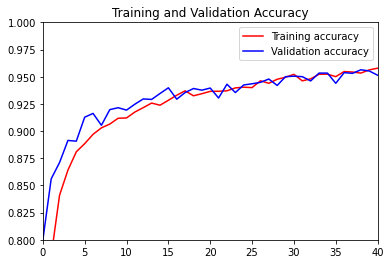

<Figure size 432x288 with 0 Axes>

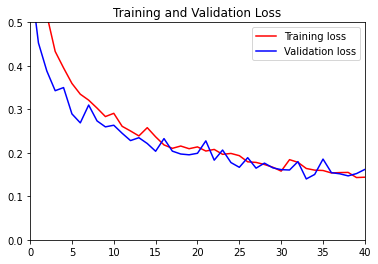

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0.8, 1)
plt.xlim(0, 40)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.ylim(0, 0.5)
plt.xlim(0, 40)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [16]:
export_path = "/content/improved_cnn_inceptionv3"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/improved_cnn_inceptionv3/assets

Saved model:
total 6848
drwxr-xr-x 2 root root    4096 Jun  1 05:11 assets
-rw-r--r-- 1 root root 7003096 Jun  1 05:11 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  1 05:11 variables


# **Download Saved Model**

In [17]:
!zip -r /content/improved_cnn_inceptionv3.zip /content/improved_cnn_inceptionv3

  adding: content/improved_cnn_inceptionv3/ (stored 0%)
  adding: content/improved_cnn_inceptionv3/saved_model.pb (deflated 93%)
  adding: content/improved_cnn_inceptionv3/assets/ (stored 0%)
  adding: content/improved_cnn_inceptionv3/variables/ (stored 0%)
  adding: content/improved_cnn_inceptionv3/variables/variables.index (deflated 78%)
  adding: content/improved_cnn_inceptionv3/variables/variables.data-00000-of-00002 (deflated 82%)
  adding: content/improved_cnn_inceptionv3/variables/variables.data-00001-of-00002 (deflated 30%)


In [0]:
files.download("/content/improved_cnn_inceptionv3.zip")

# **Save to Google Drive**

In [18]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp improved_cnn_inceptionv3.zip '/content/gdrive/My Drive/Saved Model/'

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/improved_cnn_inceptionv3.zip
model = tf.keras.models.load_model('/content/improved_cnn_inceptionv3/')
model.summary()

# **Upload Saved Model From Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [20]:
!cp '/content/gdrive/My Drive/Saved Model/improved_cnn_inceptionv3.zip' /content/
!unzip /content/improved_cnn_inceptionv3.zip
model = tf.keras.models.load_model('/content/improved_cnn_inceptionv3/')
model.summary()

Archive:  /content/improved_cnn_inceptionv3.zip
   creating: content/improved_cnn_inceptionv3/
  inflating: content/improved_cnn_inceptionv3/saved_model.pb  
   creating: content/improved_cnn_inceptionv3/assets/
   creating: content/improved_cnn_inceptionv3/variables/
  inflating: content/improved_cnn_inceptionv3/variables/variables.index  
  inflating: content/improved_cnn_inceptionv3/variables/variables.data-00000-of-00002  
  inflating: content/improved_cnn_inceptionv3/variables/variables.data-00001-of-00002  
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 6, 6, 2048)        21802784  
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0       

# **Try Classification**

In [21]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg


Result :
Mosaic Virus
